# Migratory Bird Patterns #


The article, "[A half-century of changes in migratory landbird numbers along coastal Massachusetts](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0222232)," from [PLOS One](https://journals.plos.org/plosone/) provided the [data](https://doi.org/10.1371/journal.pone.0222232.s003) for this [visualization](https://www.planetdata.world/Migration/pattern).


17 June 2020

In [23]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [24]:
# Read in csv
df = pd.read_csv('birds.csv')

In [25]:
def wrangle(df):

    '''Drops unnecessary columns'''

    df = df.copy()

    cols_to_drop = ['NET.HOURS','X.1']

    df.drop(columns=cols_to_drop, inplace=True)

    return df

In [26]:
# Letter refers to the species
# freq refers to the number of new bird captures/banding
birds = wrangle(df)
birds.head()

,Year,Letter,freq
0,1969,AMGO,10
1,1969,BTNW,15
2,1969,SWSP,19
3,1969,WOTH,12
4,1969,PRAW,7


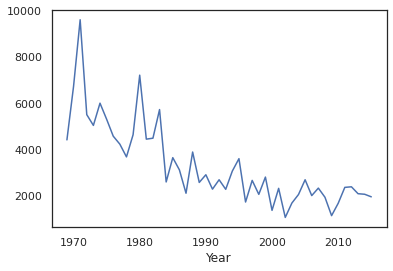

In [27]:
# Decrease in new bird observations over the years
bird_counts_by_year = birds.groupby('Year')['freq'].sum()
bird_counts_by_year.plot();

In [28]:
# Just get specific years for visualization
bird_counts_for_vis = birds[
                            (birds['Year'] == 1970) | 
                            (birds['Year'] == 1975) | 
                            (birds['Year'] == 1981) | 
                            (birds['Year'] == 1985) |  
                            (birds['Year'] == 1990) |  
                            (birds['Year'] == 1998) | 
                            (birds['Year'] == 2004) | 
                            (birds['Year'] == 2011) | 
                            (birds['Year'] == 2015)]

# Double-check our values
bird_counts_for_vis['Year'].unique()

array([1970, 1975, 1981, 1985, 1990, 1998, 2004, 2011, 2015])

In [29]:
# Double-check that we are seeing a trend
bird_counts_for_vis.groupby("Year")['freq'].sum()

Year
1970    6700
1975    5285
1981    4422
1985    3620
1990    2880
1998    2031
2004    2024
2011    2333
2015    1924
Name: freq, dtype: int64

In [30]:
# Create data
x = bird_counts_for_vis['freq']
x = x[x.between(x.quantile(.15), x.quantile(.85))] 

df = pd.DataFrame(dict(x=x, g=bird_counts_for_vis['Year']))

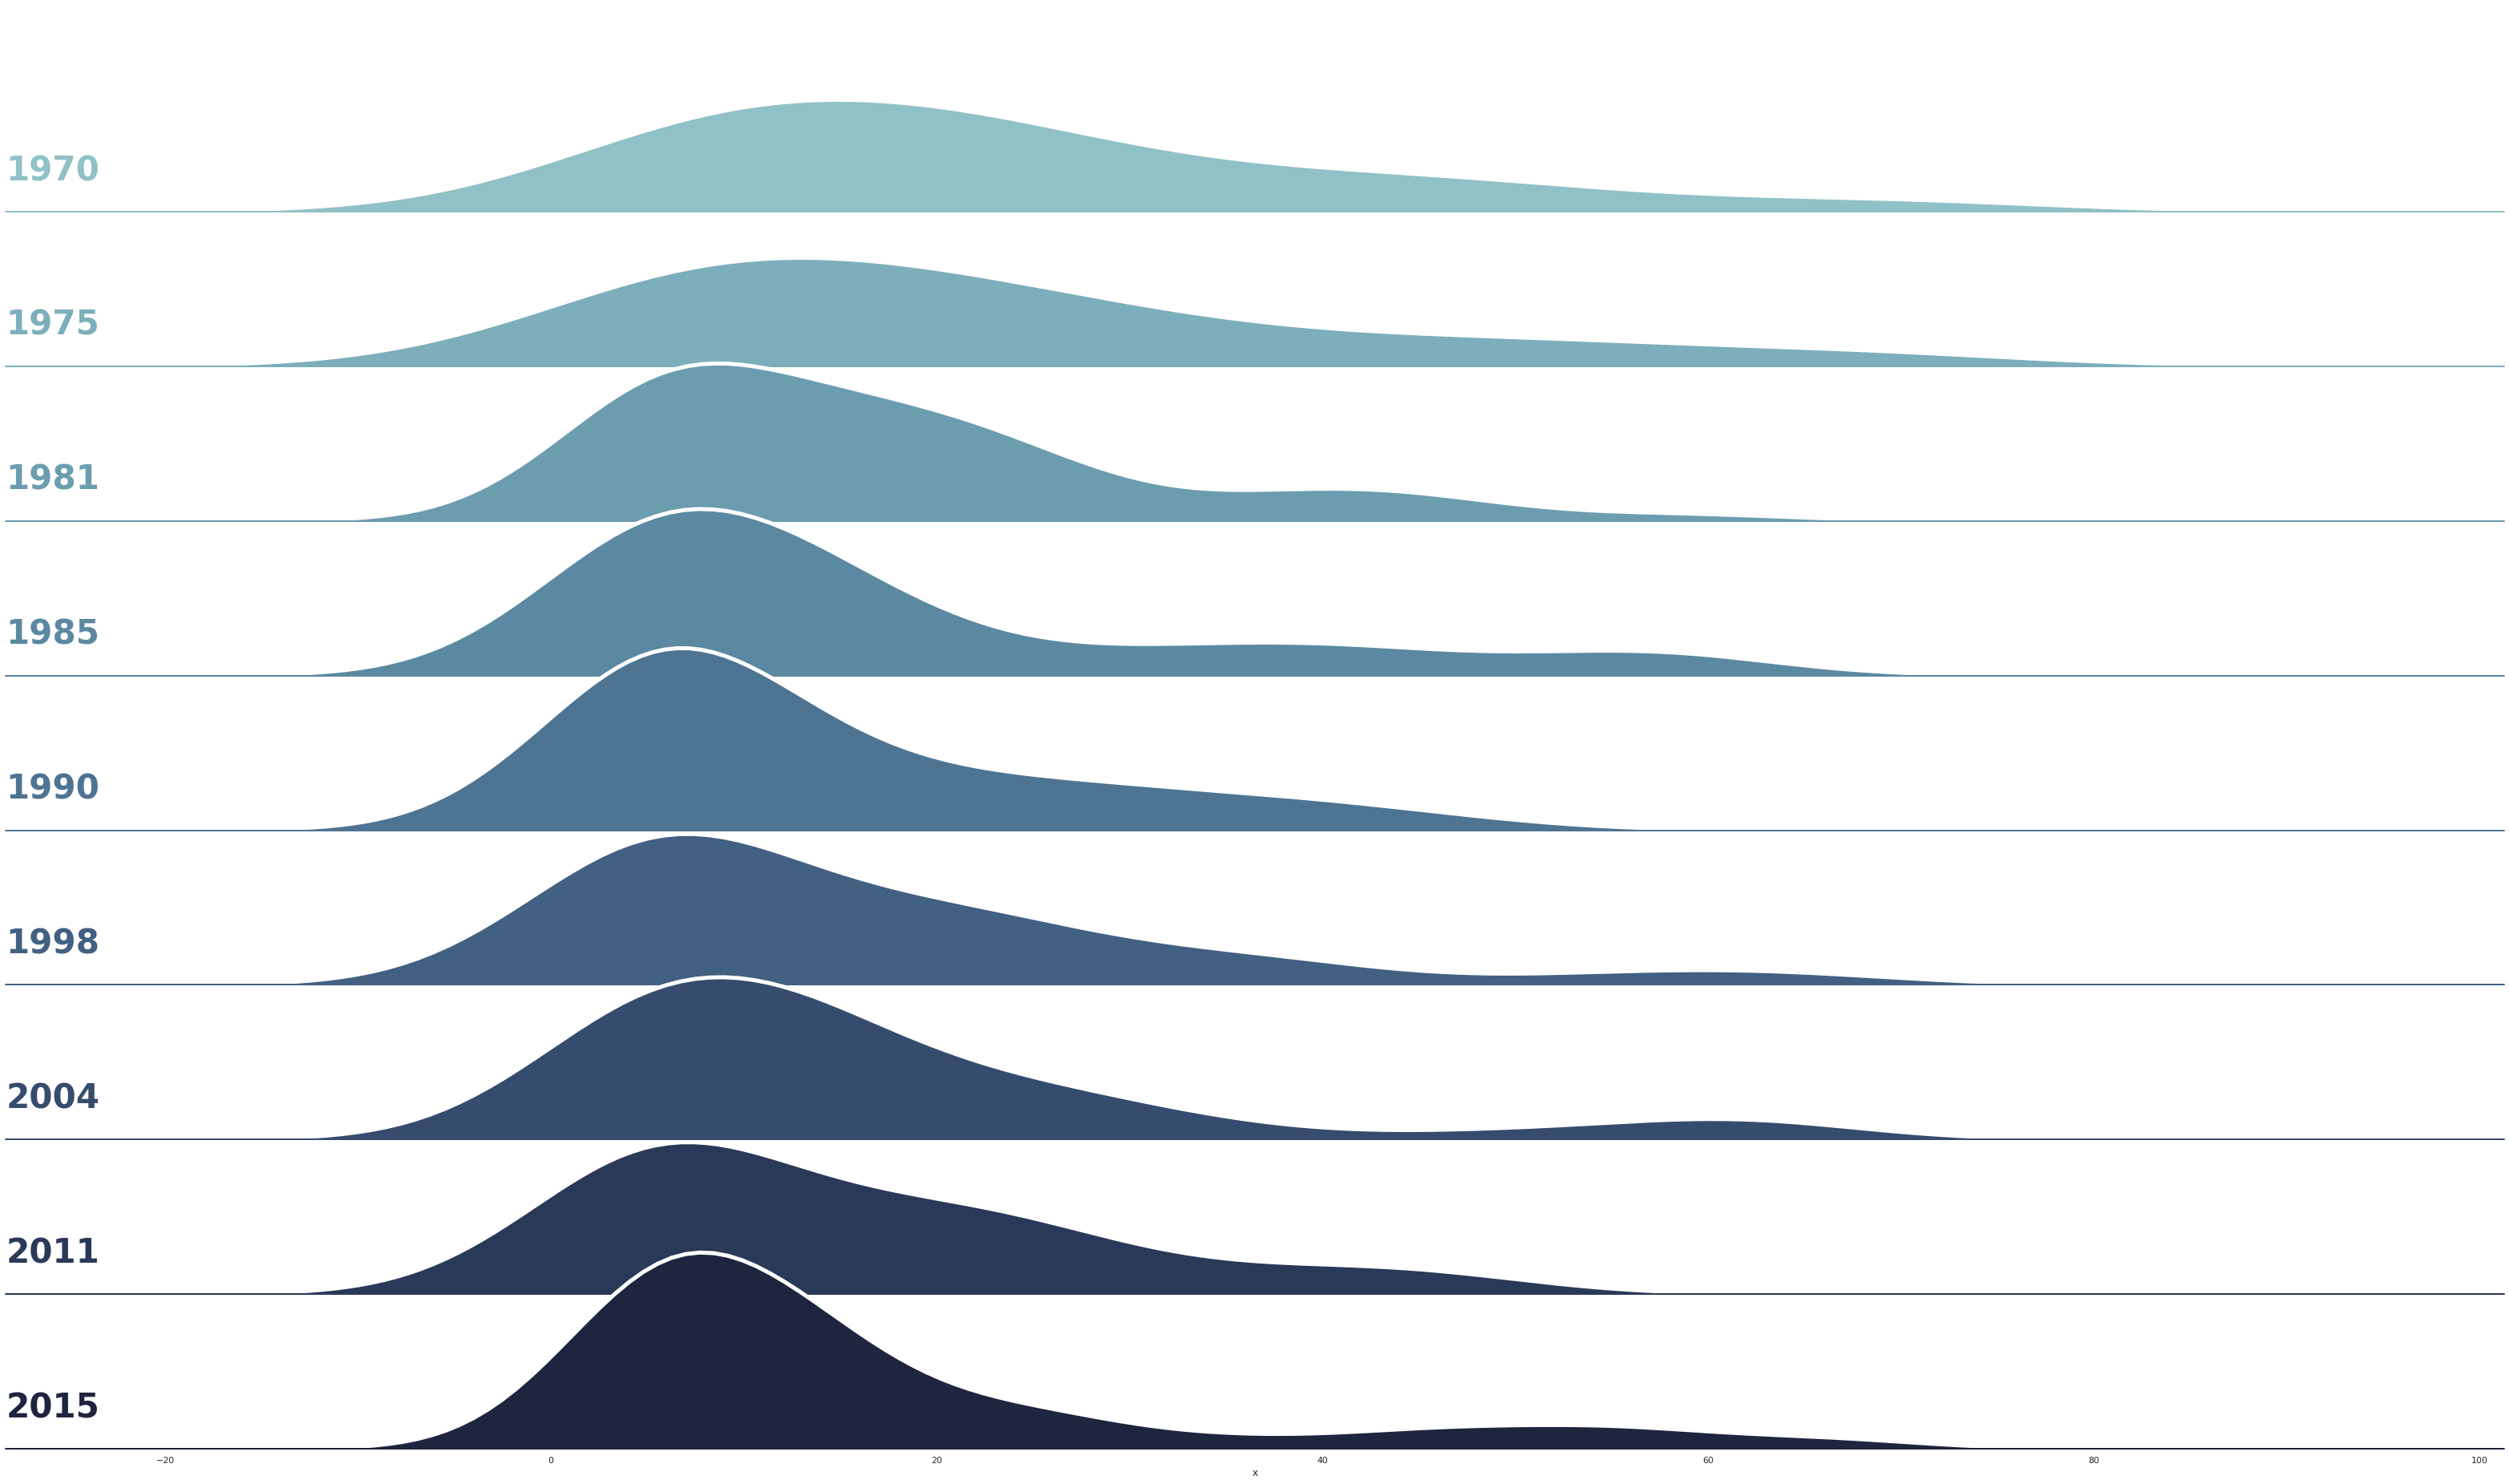

In [32]:
# Visualization
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(9, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="g", hue="g", aspect=15, height=3, palette=pal)

#Draw the densities in a few steps
g.map(sns.kdeplot, "x", clip_on=None, shade=True, alpha=1, lw=1.5)
g.map(sns.kdeplot, "x", clip_on=None, color="w", lw=5)
g.map(plt.axhline, y=0, lw=2, clip_on=None)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)
plt.rcParams.update({'font.size': 42})

g.map(label, "x")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True);

In [33]:
wide.to_csv('wide_bird.csv', index=False)
wide.to_json('wide_bird.json', orient='records')

In [ ]:
# Re-done in D3 using a tutorial
<!DOCTYPE html>
<meta charset="utf-8">
​
<script src="https://d3js.org/d3.v5.js"></script>
​
​
<div id="my_dataviz"></div>
​
<style>
.xAxis line {
  stroke: #B8B8B8;
}
</style>
​
<script src="https://d3js.org/d3-scale-chromatic.v1.min.js"></script>
​
​
<script>
​
// set the dimensions and margins of the graph
var margin = {top: 80, right: 30, bottom: 50, left:110},
    width = 460 - margin.left - margin.right,
    height = 400 - margin.top - margin.bottom;
​
// append the svg object to the body of the page
var svg = d3.select("#my_dataviz")
  .append("svg")
    .attr("width", width + margin.left + margin.right)
    .attr("height", height + margin.top + margin.bottom)
  .append("g")
    .attr("transform",
          "translate(" + margin.left + "," + margin.top + ")");
​
//read data
d3.json("https://4eo1w5jvy0.execute-api.us-east-1.amazonaws.com/default/migration_density").then(function(data) {
    console.log(data);
​
  // Get the different categories and count them
  var categories = ["1970","1975","1981","1985","1990","1998","2004","2011","2015"]
  var n = categories.length
​
  // Compute the mean of each group
  allMeans = []
  for (i in categories){
    currentGroup = categories[i]
    mean = d3.mean(data, function(d) { return +d[currentGroup] })
    allMeans.push(mean)
  }
​
  // Create a color scale using these means.
  var myColor = d3.scaleSequential()
    .domain([0,100])
    .interpolator(d3.interpolateRainbow);
​
  // Add X axis
  var x = d3.scaleLinear()
    .domain([-10, 120])
    .range([ 0, 50 ]);
  var xAxis = svg.append("g")
    .attr("class", "xAxis")
    .attr("transform", "translate(0," + height + ")")
    .call(d3.axisBottom(x).tickValues([0,25, 50, 75, 100]).tickSize(-height) )
​
  // Add X axis label:
  svg.append("text")
      .attr("text-anchor", "end")
      .attr("x", width)
      .attr("y", height + 40)
      .text("Bird observations at each station");
​
  // Create a Y scale for densities
  var y = d3.scaleLinear()
    .domain([0, 0.25])
    .range([ height, 0]);
​
  // Create the Y axis for names
  var yName = d3.scaleBand()
    .domain(categories)
    .range([0, height])
    .paddingInner(1)
  svg.append("g")
    .call(d3.axisLeft(yName).tickSize(0))
    .select(".domain").remove()
​
  // Compute kernel density estimation for each column:
  var kde = kernelDensityEstimator(kernelEpanechnikov(7), x.ticks(40)) // increase this 40 for more accurate density.
  var allDensity = []
  for (i = 0; i < n; i++) {
      key = categories[i]
      density = kde( data.map(function(d){  return d[key]; }) )
      allDensity.push({key: key, density: density})
  }
​
  // Add areas
  var myCurves = svg.selectAll("areas")
    .data(allDensity)
    .enter()
    .append("path")
      .attr("class", "myCurves")
      .attr("transform", function(d){return("translate(0," + (yName(d.key)-height) +")" )})
      .attr("fill", function(d){
        grp = d.key ;
        index = categories.indexOf(grp)
        value = allMeans[index]
        return myColor( value  )
      })
      .datum(function(d){return(d.density)})
      .attr("opacity", 0.7)
      .attr("stroke", "#000")
      .attr("stroke-width", 0.1)
      .attr("d",  d3.line()
          .curve(d3.curveBasis)
          .x(function(d) { return x(0); })
          .y(function(d) { return y(d[1]); })
      )
​
  // Animate X axis apparition
  x.range([ 0, width ]);
  xAxis
    .transition()
    .duration(5000)
    .call(d3.axisBottom(x).tickValues([0,25, 50, 75, 100]).tickSize(-height) )
    .select(".domain").remove()
​
  // Animate densities apparition
  myCurves
    .transition()
    .duration(5000)
    .attr("d",  d3.line()
        .curve(d3.curveBasis)
        .x(function(d) { return x(d[0]); })
        .y(function(d) { return y(d[1]); })
    )
​
})
​
// This is what I need to compute kernel density estimation
function kernelDensityEstimator(kernel, X) {
  return function(V) {
    return X.map(function(x) {
      return [x, d3.mean(V, function(v) { return kernel(x - v); })];
    });
  };
}
function kernelEpanechnikov(k) {
  return function(v) {
    return Math.abs(v /= k) <= 1 ? 0.75 * (1 - v * v) / k : 0;
  };
}
​
</script>